# Path pattern generation using an Evolutionary computing aproach

in this module we will explore on how we can generate a valid sequence based on genetic and evolutionary computing.

## Libraries

In [19]:
import random
import heapq
import numpy as np
import cv2 as cv
import ppg_init as ppg
import seqeval

## Fetch preprocessed data

In [2]:
number_gray = np.zeros((ppg.NO_DIGITS, ppg.IMG_WIDTH ,ppg.IMG_HEIGHT))
for i in range (ppg.NO_DIGITS):
    number_image = cv.imread(ppg.IMAGE_PATH+' '+str(i)+' dilated.png')
    number_gray[i] = cv.cvtColor(number_image, cv.COLOR_BGR2GRAY)

## Sample black pixels

there are two ways to sample the pixels. sampling based on their distribution, sampling them based on their sufficient black pixel in a subarea of the image and uniformly distribute them. here we try both and compare the results.

### Change resolution


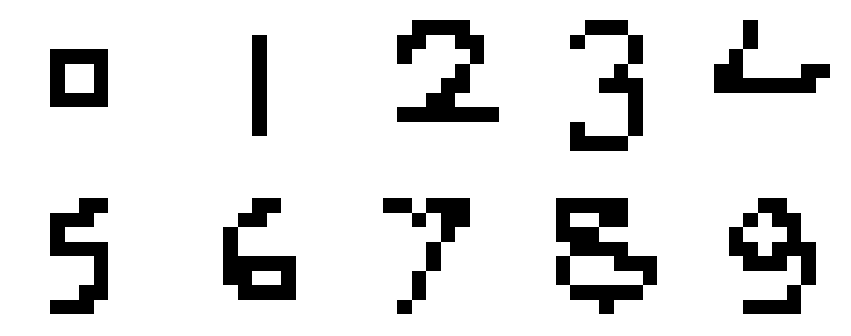

In [3]:
stride = 30
lrbp_threshold = 10 # low resolution black pixels threshold. 
# this is used when we want to count the number of the black pixels in the high resolution image
# and decide whether to mark the corresponding pixel in low resolution image black.
new_imgw = int(ppg.IMG_WIDTH/stride)
new_imgh = int(ppg.IMG_HEIGHT/stride)
new_img = np.ones((ppg.NO_DIGITS, new_imgw, new_imgh))*255
new_img2 = np.ones((ppg.NO_DIGITS, new_imgw, new_imgh))*255
# stride is always an odd number.

for i in range(ppg.NO_DIGITS):
    my_img = number_gray[i]
    # jump a 3,3 square and check for any black pixel within the area.

    for x in range(0, len(my_img), stride):
        for y in range(0, len(my_img[x]), stride):
            # stride is always an odd number.
            offset = int((stride-1)/2)
            new_x = int(x/stride)
            new_y = int(y/stride)
            black_pxl_vec = my_img[x-offset:x+offset+1,y-offset:y+offset+1]<50
            black_pxl_num = np.sum(black_pxl_vec)
#             print(has_black_pxl, end=' ')
            if(black_pxl_num>lrbp_threshold): # has at least one black pixel
                new_img[i,new_x,new_y] = 0
#         print(' ')
#     print('====================')
ppg.plot_digits(new_img)

## Initialize the sequence of the black pixels

In [4]:
sequence_num = []
for digit in range(10):
    sequence = []
    for row in range(len(new_img[digit])):
        for col in range(len(new_img[digit, row])):
            if new_img[digit, row, col]==0:
                sequence.append((row, col))
    sequence_num.append(sequence)
    print('black pixels list for number ', digit, ':')
    print(sequence, '\n')

black pixels list for number  0 :
[(3, 3), (3, 4), (3, 5), (3, 6), (4, 3), (4, 6), (5, 3), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)] 

black pixels list for number  1 :
[(2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5)] 

black pixels list for number  2 :
[(1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 7), (2, 8), (3, 3), (3, 8), (4, 7), (5, 6), (5, 7), (6, 5), (6, 6), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9)] 

black pixels list for number  3 :
[(1, 4), (1, 5), (1, 6), (2, 3), (2, 7), (3, 7), (4, 6), (5, 5), (5, 6), (5, 7), (6, 7), (7, 7), (8, 3), (8, 7), (9, 3), (9, 4), (9, 5), (9, 6)] 

black pixels list for number  4 :
[(1, 3), (2, 3), (3, 2), (4, 1), (4, 2), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7)] 

black pixels list for number  5 :
[(1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (3, 3), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (7, 5), (7, 6), (8, 3), (8, 4), (8, 5)] 

black pixels list for number  6 :
[(1, 5), (1, 6), (2, 4),

## Configurations, Parameters and Constants

In [5]:
P_MUTATION = 0.8
P_CROSSOVER = 1.0
POPULATION_SIZE = 100
DIGIT = 0

## Genetic algorithm general model template

In [6]:
# genetic algorithm general model template
def train_evolve(mutation,
                 crossover,
                 parent_sel, 
                 population_sel, 
                 population_init, 
                 population_terminate, 
                 fitness_func, 
                 geno2pheno):
    population_heap = []
    population = population_init()
    generation = 0
    fitness_func.count = 0
    avg_fitness_profile = []
    best_fitness_profie = []
    while(population_terminate(population_heap, fitnessfunc.count, generation)):
        generation_fitness_profile = []
        best_fitness = 0
        for individual in population:
            ind_phenotype = geno2pheno(individual)
            fitness = fitness_func(ind_phenotype)
            generation_fitness_profile.append(fitness)
            if(fitness > best_fitness):
                best_fitness = fitness
            heappush(population_heap, (1/fitness, individual))
            
        selected_parents = parent_sel(population_heap)
        children = crossover(selected_parents)
        for child in children:
            mutation(child)
            child_phenotype = geno2pheno(individual)
            fitness = fitness_func(child_phenotype)
            if(fitness > best_fitness):
                best_fitness = fitness
            heappush(population_heap, (1/fitness, child))
        
        fitness_avg = np.average(generation_fitness_profile)
        avg_fitness_profile.append(fitness_avg)
        best_fitness_profile.append(best_fitness)
        generation_profile = list(range(generation))
        population = population_sel(population_heap)
        generation +=1
    
        

## Functions and behaviors

In [11]:
# mutations -----------------------------------
def insert_mutation(child):
    pass

def scramble_mutation(child):
    pass

def inversion_mutation(child):
    pass

def swap_mutation(child):
    
# mutations -----------------------------------
# crossovers ----------------------------------
def order1_crossover(sel_parents):
    pass

def partially_mapped_crossover(sel_parents):
    pass

def cycle_crossover(sel_parents):
    pass

def edge_recombination(sel_parents):
    pass
# crossovers ----------------------------------
# steady state genetic algorithms -------------
# 20 best inidividuals
def parent_selection1():
    pass

# of 20 best inidividuals random select 10
def parent_selection2():
    pass

# of 20 random inidividuals select the best 10
def parent_selection3():
    pass

# random 20 individuals but the individuals with better fitness have higher chances
def parent_selection4(population):
    allpopulation = heapq.nsmallest(POPULATION_SIZE, population)
    selected = random.sample(allpopulation, 20)
    selected_raw = [x[1] for x in selected]
    return selected_raw

# all the population is selected.
def parent_selection5(population):
    return population

# eliminate worst fitted individuals
def survival_seleciton1(population):
    selected = heapq.nlargest(POPULATION_SIZE, population)
    # remove tuple from the list:
    # selected = list(map(lambda x: x[0], selected))
    selected_raw = [x[1] for x in selected]
    return selected_raw
    
# the worse fitness value the higher chances of getting eliminated
def survival_seleciton2(population):
    pass
# steady state genetic algorithms -------------

# random individual initializing
def population_init():
    population = []
    for i in range(POPULATION_SIZE):
        std_ind = list(range(len(sequence_num[DIGIT])))
        individual = random.shuffle(std_ind)
        population.append(individual)
    return population

# the termination can be based on:
# 1. population or the average fitness
# 2. fitness evaluations
# 3. generation number
def population_terminate(population, evaluation_counter, generation):
    return generation<1000

def geno2pheno(genotype):
    phenotype = []
    for order in genotype:
        phenotype.append(sequence_num[DIGIT, order])
    return phenotype
        
def fitness_func(individual):
    fitness_func.count +=1
    mse = seqeval.seqeval_MSE(individual, ppg.LOW_RESOLUTION_IMG_SIZE, new_img[DIGIT])
    fitness = 1/mse
    return fitness

## Training path generating

### Training for separate digits

### Training for all digits and general model

In [12]:
# # a = [random.shuffle(sequence_num[DIGIT]) for i in range(10)]
# # b = random.shuffle(sequence_num[DIGIT])
# a = list(range(len(sequence_num[DIGIT])))
# random.shuffle(a)
# print(a)